In [1]:
#import libiraies 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 

df4=pd.read_csv("15_9-19A-CORE.csv")
print(df4.head())

     DEPTH  OrigDepth  CORE_NO  SAMPLE   CKHG    CKHL  CKVG  CKVL  CPOR  \
0  3838.60    3837.00        1       1  13.80  11.500   NaN   NaN  17.0   
1  3838.85    3837.25        1       2    NaN     NaN   NaN   NaN  14.8   
2  3839.15    3837.55        1       3  25.20  21.400  3.94  3.16  10.8   
3  3839.40    3837.80        1       4   1.02   0.694   NaN   NaN  12.8   
4  3839.48    3837.88        1       5    NaN     NaN   NaN   NaN   NaN   

   CPORV    So    Sw   CGD  CGDV  
0    NaN   NaN   NaN  2.66   NaN  
1    NaN   NaN   NaN  2.67   NaN  
2    NaN   NaN   NaN  2.69   NaN  
3    NaN   NaN   NaN  2.70   NaN  
4   18.8  52.9  36.4   NaN  2.68  


In [2]:
df4.describe()

,DEPTH,OrigDepth,CORE_NO,SAMPLE,CKHG,CKHL,CKVG,CKVL,CPOR,CPORV,So,Sw,CGD,CGDV
count,728.000000,728.000000,728.00000,728.000000,557.000000,557.000000,141.000000,141.000000,593.000000,71.000000,71.000000,71.000000,594.000000,71.000000
mean,3920.528338,3920.153338,3.93956,364.500000,649.801463,627.972549,490.086071,472.875284,16.829342,19.497183,56.943662,28.309859,2.653569,2.656901
std,46.545695,46.902816,1.75976,210.299786,2160.127387,2116.307023,1973.601098,1929.420018,6.552523,5.657763,21.084319,19.203758,0.046735,0.035560
min,3838.600000,3837.000000,1.00000,1.000000,0.018000,0.010000,0.030000,0.017000,2.900000,2.700000,0.000000,4.500000,2.250000,2.620000
25%,3882.580000,3881.980000,3.00000,182.750000,2.620000,2.030000,0.874000,0.590000,12.000000,18.150000,52.000000,18.200000,2.640000,2.630000
50%,3921.725000,3921.125000,4.00000,364.500000,59.900000,52.300000,27.300000,23.300000,18.100000,21.200000,62.300000,22.800000,2.650000,2.650000
75%,3960.287500,3960.487500,5.00000,546.250000,213.000000,194.000000,108.000000,96.300000,21.700000,23.500000,68.500000,29.950000,2.660000,2.660000
max,3999.950000,3999.750000,7.00000,728.000000,20800.000000,20500.000000,14800.000000,14500.000000,36.000000,27.800000,86.000000,90.800000,3.030000,2.810000


<Figure size 1000x1000 with 0 Axes>

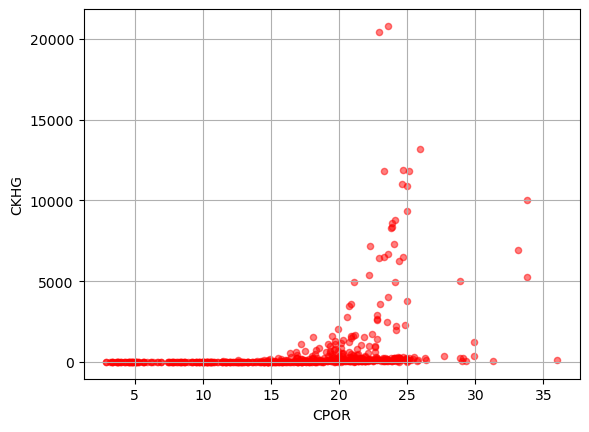

In [3]:
fig=plt.figure(figsize=(10,10))

df4.plot(kind="scatter" , x="CPOR" , y="CKHG" , color="red" , alpha=0.5)
plt.grid()
plt.show()

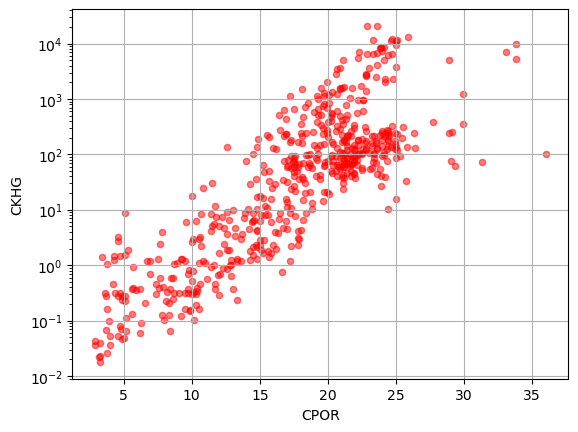

In [4]:
df4.plot(kind="scatter" , x="CPOR" , y="CKHG" , color="red" , alpha=0.5)
plt.yscale("log")
plt.grid()
plt.show()

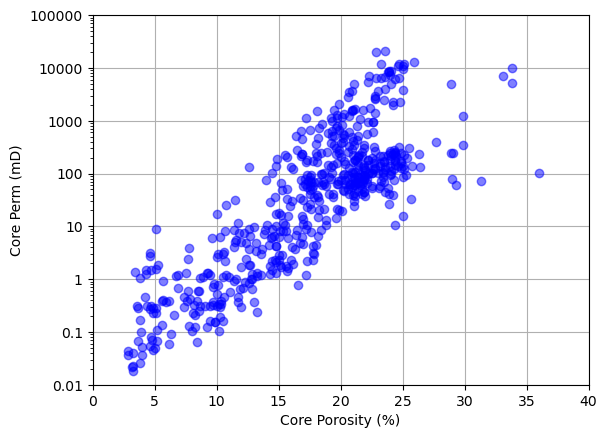

In [5]:
from matplotlib.ticker import FuncFormatter
fig,ax=plt.subplots()

ax.axis([0, 40, 0.01, 100000])
ax.plot( df4["CPOR"] , df4["CKHG"] , "bo" , alpha=0.5 )
ax.set_yscale('log')
ax.grid()
ax.set_ylabel("Core Perm (mD)")
ax.set_xlabel("Core Porosity (%)")

for axis in [ax.yaxis , ax.xaxis]:
    formatter=FuncFormatter(lambda y , _ : '{:.16g}'.format(y))
    axis.set_major_formatter(formatter)
    

    

In [6]:
import statsmodels.api as sm

x=df4["CPOR"]
y=np.log10(df4["CKHG"])

model=sm.OLS(y,x,missing='drop')
result=model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   CKHG   R-squared (uncentered):                   0.793
Model:                            OLS   Adj. R-squared (uncentered):              0.793
Method:                 Least Squares   F-statistic:                              2129.
Date:                Tue, 09 May 2023   Prob (F-statistic):                   2.80e-192
Time:                        14:35:58   Log-Likelihood:                         -726.48
No. Observations:                 557   AIC:                                      1455.
Df Residuals:                     556   BIC:                                      1459.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CPOR           0.0949      0.002     46.145      0.000       0.091       0.099
==============================================================================
Omnibus:                        9.398   Durbin-Watson:                   0.654
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                7.595
Skew:                           0.198   Prob(JB):                       0.0224
Kurtosis:                       2.588   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

LinAlgError: SVD did not converge in Linear Least Squares

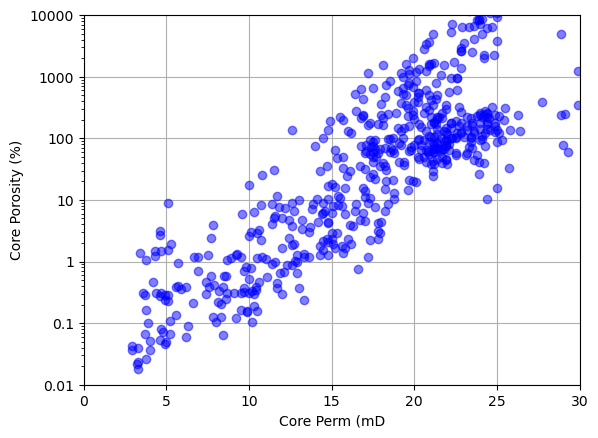

In [33]:
from matplotlib.ticker import FuncFormatter
fig,ax=plt.subplots()
ax.axis([0,30,0.01,10000])
ax.semilogy(df4['CPOR'] , df4['CKHG'] , 'bo' , alpha=0.5)
ax.set_ylabel("Core Porosity (%)")
ax.set_xlabel("Core Perm (mD")
ax.grid()

for axis in [ax.xaxis , ax.yaxis]:
    formatter=FuncFormatter(lambda y , _: "{:.16g}".format(y))
    axis.set_major_formatter(formatter)

x=np.polyfit(df4["CPOR"] , np.log10(df4["CKHG"]),1)
ax.semilogy(df4["CPOR"] , 10**(x[0] * df4["CPOR"] + x[1]))
    

LinAlgError: SVD did not converge in Linear Least Squares

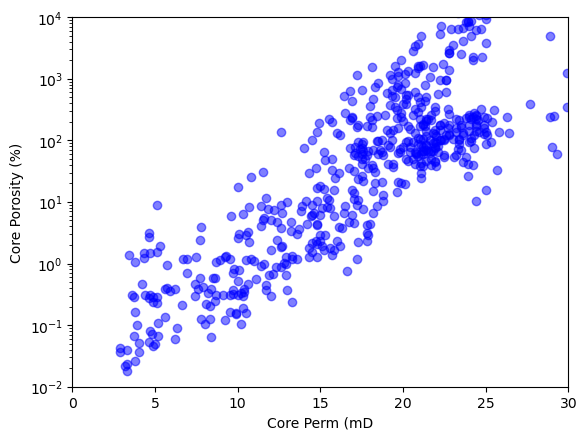

In [29]:
from matplotlib.ticker import FuncFormatter
fig,ax = plt.subplots()

ax.axis([0, 30, 0.01, 10000])
ax.semilogy(df4["CPOR"],df4["CKHG"] , "bo" , alpha=0.5)
ax.set_xlabel("Core Perm (mD")
ax.set_ylabel("Core Porosity (%)")
x=np.polyfit(df4['CPOR'] , np.log10(df4['CKHG']),1)
ax.semilogy(df4['CPOR'], 10**(x[0] * df4['CPOR'] + x[1]), 'r-')

ax.grid()

for axis in [ax.xaxis , ax.yaxis]:
    formatter=FuncFormatter(lambda y , _: "{:.16g}".format(y))
    axis.set_major_formatter(formatter)